 ## Prediction of Optimal Location for setting up a coaching institute

We will use the clusturing method to find optimal Solution to the problem. We are using the data from Foursquare API\
and will mainly be using the location coordinates.

In [55]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt #library to plot a graph
from sklearn.cluster import KMeans #library for K Means
%matplotlib inline

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library for map

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Folium installed
Libraries imported.


Now we will input the Client ID and Client Secret for gathering information from Foursquare API

In [56]:
CLIENT_ID = 'NAEG5PK5YPSB5KCU05ERESVK3WMVILXOY3WXLGLCZJNRGAXF'
CLIENT_SECRET = 'CL0BLCB3S21FUPV0MKZJMPSN1VOI4IXKFGGCWV2BQ4ECGKDV'
VERSION = '20191218'
LIMIT = 50

We want to gather information about colleges in Pune and to do so we have to pass two location coordinates to the foursqaure
API.
1. The main City
2. The Outercity i.e. Pimpri Chinchwad.
In the next few cells we will pass gather coordinates of both the areas and pass it to Foursquare API, gather Information, put it in a dataframe and then use it carry out our clustering.

In [57]:
address = 'Pune, Mahārāshtra, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

18.521428 73.8544541


In [61]:
search_query = 'College & University'
Radius = 10000
print(search_query + ' .... OK!')

College & University .... OK!


In [62]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, Radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=NAEG5PK5YPSB5KCU05ERESVK3WMVILXOY3WXLGLCZJNRGAXF&client_secret=CL0BLCB3S21FUPV0MKZJMPSN1VOI4IXKFGGCWV2BQ4ECGKDV&ll=18.521428,73.8544541&v=20191218&query=College & University&radius=10000&limit=50'

In [63]:
results = requests.get(url).json()

In [64]:
# assigning relevant part of JSON to venues
venues = results['response']['venues']

# tranforming venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,4d6ab9ac9d7e2d4300a819b3,P.E.S. Modern College of Engineering,"[{'id': '4bf58dd8d48988d19e941735', 'name': 'C...",v-1576704384,False,"Shivajinagar, Pune, Maharashtra","1186/A, Off J.M. Road",18.525628,73.846090,"[{'label': 'display', 'lat': 18.52562811414942...",998,411005,IN,Pune,Mahārāshtra,India,"[Shivajinagar, Pune, Maharashtra (1186/A, Off ...",NaN
1,4e5700e6b993bf36edfc65d0,Modern College Of Science,"[{'id': '4bf58dd8d48988d19b941735', 'name': 'C...",v-1576704384,False,Modern College Road,Off JM Road,18.526315,73.845694,"[{'label': 'display', 'lat': 18.52631498125122...",1072,NaN,IN,Pune,Mahārāshtra,India,"[Modern College Road (Off JM Road), Pune, Mahā...",NaN
2,4e1fc5c41838712abe601b1f,S. P. College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1576704384,False,Tilak Road,NaN,18.507308,73.849743,"[{'label': 'display', 'lat': 18.50730817151161...",1648,411030,IN,Pune,Mahārāshtra,India,"[Tilak Road, Pune 411030, Mahārāshtra, India]",NaN
3,5066c65ae4b0bb2af9550efc,Fergusson College Road,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",v-1576704384,False,Shivaji Nagar,Ferguson College Rd,18.520328,73.841421,"[{'label': 'display', 'lat': 18.52032787237845...",1381,411004,IN,Pune,Mahārāshtra,India,"[Shivaji Nagar (Ferguson College Rd), Pune 411...",NaN
4,4d6ab55b9d7e2d432d7e19b3,Fergusson College,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",v-1576704384,False,Fergusson College Rd,Shivaji Nagar,18.522833,73.839503,"[{'label': 'display', 'lat': 18.5228330531064,...",1585,411004,IN,Pune,Mahārāshtra,India,"[Fergusson College Rd (Shivaji Nagar), Pune 41...",NaN


For Pimpri Chinchwad

In [69]:
address = 'Pimpri-Chinchwad, Mahārāshtra, India'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

18.6279288 73.8009829


In [70]:
search_query = 'College & University'
Radius = 10000
print(search_query + ' .... OK!')

College & University .... OK!


In [71]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, Radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=NAEG5PK5YPSB5KCU05ERESVK3WMVILXOY3WXLGLCZJNRGAXF&client_secret=CL0BLCB3S21FUPV0MKZJMPSN1VOI4IXKFGGCWV2BQ4ECGKDV&ll=18.6279288,73.8009829&v=20191218&query=College & University&radius=10000&limit=50'

In [72]:
results = requests.get(url).json()

In [73]:
# assigning relevant part of JSON to venues
venues = results['response']['venues']

# tranforming venues into a dataframe
dataframe2 = json_normalize(venues)
dataframe2.head()

,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.postalCode,location.city,location.state,location.crossStreet
0,4d83307802eb5481401614f5,D Y Patil Medical College,"[{'id': '4bf58dd8d48988d197941735', 'name': 'C...",v-1576704434,False,18.624557,73.820710,"[{'label': 'display', 'lat': 18.62455720850943...",2114,IN,India,[India],NaN,NaN,NaN,NaN,NaN
1,4fb2183be4b07eeb437fba20,ophathal opd d. y patil medical college,"[{'id': '4bf58dd8d48988d177941735', 'name': 'D...",v-1576704434,False,18.623299,73.802246,"[{'label': 'display', 'lat': 18.62329864501953...",532,IN,India,"[D. Y Patil Medical College, Pimpri,pune 41101...",D. Y Patil Medical College,411018,"Pimpri,pune",Mahārāshtra,NaN
2,5108970ce4b0e0092a4f883e,indira college of commerce and science dhruv b...,"[{'id': '4bf58dd8d48988d19b941735', 'name': 'C...",v-1576704434,False,18.630693,73.791356,"[{'label': 'display', 'lat': 18.63069344484637...",1061,IN,India,[India],NaN,NaN,NaN,NaN,NaN
3,50aa4860498eeb8d61d0604b,College Mess,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",v-1576704434,False,18.624766,73.821089,"[{'label': 'display', 'lat': 18.624766408696, ...",2149,IN,India,"[D Y Patil Medical College, India]",D Y Patil Medical College,NaN,NaN,NaN,NaN
4,51b95dd5498e165e6ae26ec0,Dr. Arvind Telang College,"[{'id': '4bf58dd8d48988d19b941735', 'name': 'C...",v-1576704434,False,18.638723,73.802816,"[{'label': 'display', 'lat': 18.63872321176424...",1217,IN,India,"[Akurdi, Pune, Mahārāshtra, India]",Akurdi,NaN,Pune,Mahārāshtra,NaN


We then create 2 numpy arrays so that we can convert the 2 1D arrays into 1 2D array which will be expected in clustering.\
LNG will give the longitudinal Data\
LAT will give the Latitudinal Data\
LAT and LNG are arrays formed my combing both the cooridnates from both the data frames in 1 array.

In [74]:
LNG=dfValues = np.concatenate([dataframe['location.lng'].values, dataframe2['location.lng'].values])
LNG

array([73.8460903 , 73.84569402, 73.84974293, 73.84142103, 73.83950275,
       73.86505127, 73.84078926, 73.83916964, 73.83939937, 73.83869868,
       73.85447502, 73.85075371, 73.82841772, 73.859137  , 73.8555069 ,
       73.82915292, 73.85722351, 73.87998297, 73.85353332, 73.85598555,
       73.85935661, 73.84790344, 73.82808459, 73.85245938, 73.86136083,
       73.86308365, 73.85487143, 73.83894564, 73.86495972, 73.84053081,
       73.8444    , 73.85746147, 73.83454041, 73.85277216, 73.81154202,
       73.8419207 , 73.84553528, 73.81575821, 73.86810303, 73.84053802,
       73.84069061, 73.84166225, 73.84646935, 73.85641479, 73.84081149,
       73.84940409, 73.84107069, 73.84107069, 73.8403298 , 73.85429498,
       73.82070953, 73.80224609, 73.79135592, 73.82108863, 73.8028164 ,
       73.75830173, 73.81180573, 73.83928299, 73.74965434, 73.81806156,
       73.8227601 , 73.81950905, 73.82030171, 73.81995133, 73.82176067,
       73.78522041, 73.84413186, 73.79985225, 73.776959  , 73.77

In [75]:
LAT=dfValues = np.concatenate([dataframe['location.lat'].values, dataframe2['location.lat'].values])
LAT

array([18.52562811, 18.52631498, 18.50730817, 18.52032787, 18.52283305,
       18.53048134, 18.52178556, 18.52080945, 18.52587937, 18.51228513,
       18.51880106, 18.52752996, 18.51713664, 18.519761  , 18.51810455,
       18.5145496 , 18.52905655, 18.53252407, 18.51699978, 18.52971766,
       18.53104814, 18.52146378, 18.5075792 , 18.52820891, 18.5257435 ,
       18.51929862, 18.52995255, 18.51249865, 18.52132416, 18.51998753,
       18.5249    , 18.45837276, 18.51265423, 18.48993161, 18.51093244,
       18.52675674, 18.53120804, 18.48571154, 18.52012444, 18.52047539,
       18.52279091, 18.52690532, 18.51006116, 18.5077343 , 18.5165195 ,
       18.5085944 , 18.52209344, 18.53058335, 18.52692963, 18.50970271,
       18.62455721, 18.62329865, 18.63069344, 18.62476641, 18.63872321,
       18.64555387, 18.61884308, 18.59793093, 18.61146347, 18.62151443,
       18.62430173, 18.62413482, 18.61869954, 18.61884883, 18.62309323,
       18.61478965, 18.58799394, 18.5639396 , 18.597005  , 18.59

In [76]:
data1=np.transpose(np.array([LAT,LNG]))
data1.shape

(100, 2)

We now have the final data that will be used in analysis.\
Now we will move towards clustering the data.

For clustering we use the K means method which will give us points where we can open the coaching centres as it will be the centroid of clusters formed by loation coordinates of various colleges. But we don't yet know how many Coaching Centres we should open. For this we need to know appropriate No. of clusters. WHich means a appropriate set of colleges such that any more set of colleges will not effect much to the distance traveled by a student to the class from College or University and any less number of set of colleges will drastically increase the distance. We will use the knee bend method which is explained after we calculat the SSE for every K Means cluster all having different No. of clusters.\
SSE is the average square of distance between a cluster centre and the elements in that cluster. More the distance, bad is the clustering.

The terms in the program are\
KMeans: Used to call the K-means algorithm.\
n_clusters: No. of clusters to be formed.\
n_init: Gives the number of iterations the KMeans algorith will perform to choose the best Clsuter.\
k_means: The K-Means fit that is performed on data.\
k_means.inertia_: Will give the SSE for a given KMeans fit\
init = "k-meas++" will give some an very good initial centre point to form the cluster.

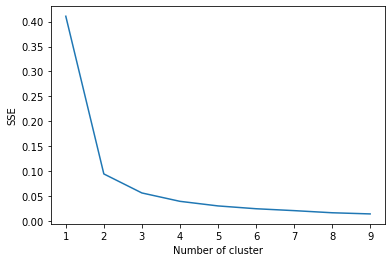

In [77]:
sse={}
for K in range(1,10):
    k_means = KMeans(init = "k-means++", n_clusters = K, n_init = 12)
    k_means.fit(data1)
    sse[K] = k_means.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From the above diagram we see that the number of SSE reduces drastically at 2 but remains almost same after words.\
The Point where such a sharp difference is observed is called knee bend and we choose\
appropriate No. of clusters to be formed = the knee bend

In [78]:
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)
k_means.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [79]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[18.52065405, 73.84497271],
       [18.61859758, 73.78901255]])

Thus we have the optimal coordinates to start a coaching institute.\
We will plot these coordinates on the map along with college coordinates so as to visualize our answer and help the concerned Coaching Classes take a good decision.\
The red dot are the places around which the centres should be opened and blue dots are the colleges.\

In [96]:
venues_map = folium.Map(location=(k_means_cluster_centers[0,0],k_means_cluster_centers[0,1]), zoom_start=10.8)

folium.features.CircleMarker(
    [k_means_cluster_centers[0,0],k_means_cluster_centers[0,1]],
    radius=7,
    color='red',
    popup='Centre 1',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(venues_map)

folium.features.CircleMarker(
    [k_means_cluster_centers[1,0],k_means_cluster_centers[1,1]],
    radius=7,
    color='red',
    popup='Centre 2',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.9
).add_to(venues_map)

for lat, lng, label in zip(dataframe['location.lat'], dataframe['location.lng'], dataframe.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup='College or University',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng, label in zip(dataframe2['location.lat'], dataframe2['location.lng'], dataframe2.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=3,
        color='blue',
        popup='College or University',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
venues_map

Hence, from in the map we see the two red dots around which the centres should be opened and blue dots represent the college\
Because the folium map cannot be displayed in the githib code, I have included a screenshot in the repository.